# 中心極限定理

データと計量経済学 4週目 別資料


---

## 中心極限定理

ある確率分布から独立に抽出したサンプルサイズ$N$の標本について、$N$が大きくなるにつれ、その標本平均$\bar X$の分布は、平均$\mu$、分散$\sigma^2 / N$の正規分布に近づく。なお$\mu, \sigma^2$は元の分布の平均と分散。これはあらゆる確率分布に対して成り立つ。

$$
\bar X \sim N(\mu, \sigma^2 / N)
$$

和と見ても同じ。いろんなものを足した値は正規分布に近づく、ということが言える。

分かりやすい動画: [中心極限定理とは何か？ 【正規分布が現れるとき・確率】](https://www.youtube.com/watch?v=XXsTu66VB-E)

正規分布が世界のいろんなところで観測できるのはこの中心極限定理から納得できる。ある要素は他の様々な要素の結果として解釈できるように、ある確率変数は他の確率変数の和として解釈できる。

日常に現れる正規分布の例として身長が挙げられる。

<img src="https://statresearch.jp/BMI/images/distribution_17.svg" width="600">

引用: [統計情報リサーチ](https://statresearch.jp/BMI/), 男女の身長の分布

身長は遺伝的要素や栄養状態、環境要因など様々な要素が影響する。それらの要素の和として身長が決まると考えると、中心極限定理により、身長の分布が正規分布に従うことが納得できる。


---

## コードで見てみる

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

### サイコロを何個か振って平均を取る

指定した数のサイコロを振って、その結果と平均を返す関数。

In [2]:
def dice_rolls(m, weights=None):
    if weights:
        weights = np.array(weights, dtype=np.float32)
        weights /= weights.sum()

    rolls = np.random.choice(np.arange(1, 7), m, p=weights)
    return rolls, rolls.mean()

In [3]:
resunts, mean = dice_rolls(10) # 10回振る
print(resunts)
print(mean)

[4 3 4 2 6 6 4 2 4 5]
4.0


重みをいじってみる。

In [4]:
weights = (1, 10, 1, 1, 1, 1) # 2がいっぱい出るように
resunts, mean = dice_rolls(10, weights)
print(resunts)
print(mean)

[2 5 2 5 2 2 5 2 1 2]
2.8


### ↑の試行を何回か繰り返して分布を見る

`dice_rolls`を指定した回数呼び出して、得られた平均値の分布を見てみよう。

In [5]:
def get_means(m, n, weights=None):
    means = []
    for _ in range(n):
        _, mean = dice_rolls(m, weights)
        means.append(mean)
    return means

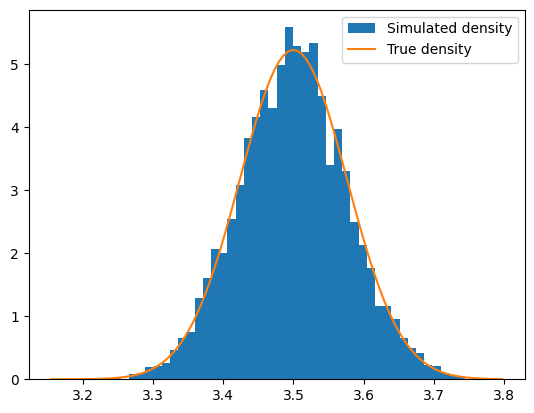

In [6]:
m, n = 500, 10000 # サイコロを500回振って平均を求める を10000回繰り返す
dist = get_means(m, n)
plt.hist(dist, bins=50, density=True, label="Simulated density")

# 正規分布のプロット
x_range = plt.xlim()
x = np.linspace(*x_range, 100)
mu, sigma = 3.5, np.sqrt(35 / 12 / m)
y = sp.stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, label="True density")
plt.legend();

重みをいじくってみる。

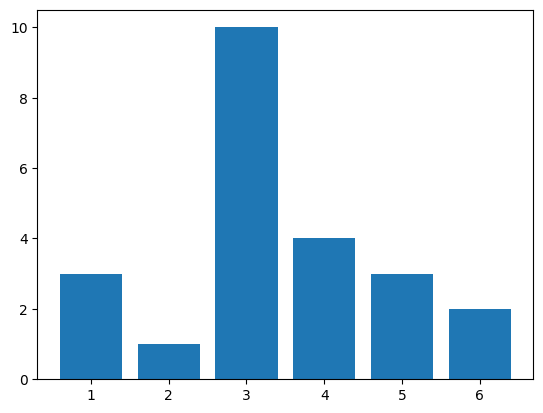

In [7]:
weights = (3, 1, 10, 4, 3, 2) # 偏らせたサイコロ
plt.bar(np.arange(1, 7), weights);

偏ったサイコロでも、平均値が同じように正規分布に近づくことが確認できる。

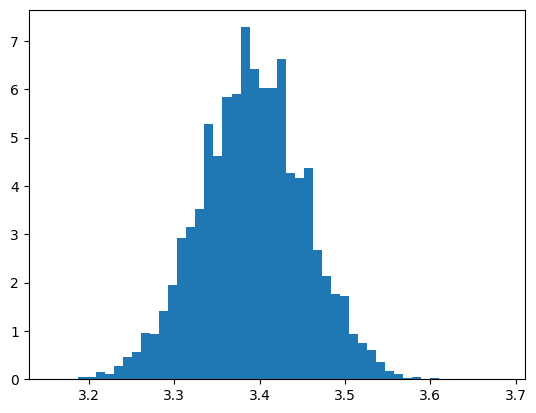

In [8]:
dist = get_means(m, n, weights)
plt.hist(dist, bins=50, density=True);

## 課題

特にサイコロの重みをいじくったとき、サンプルサイズが小さいと正規分布に近づかないことがある。

### 課題1

サンプルサイズを次第に大きくすることで正規分布に近づくことを視覚的に確認しよう。

1. 偏った重みを設定する
2. サンプルサイズを適当に増やして、各サンプルサイズで以下を行う（サンプル数は固定でいい）。
    - ↑で示したように、実際にサンプリングを行い、得られた結果のヒストグラムを正しい正規分布の確率密度関数と重ねて描画する。

### 課題2（オプション）

課題1の各段階で、正しい正規分布とのKLダイバージェンスを計算し、本当に近づいているか確認しよう。